# Orders

✏️ **Exercise**

Today, we will investigate the **orders**, and their associated review score.

For that purpose, we will create one single data table containing **all our orders with some engineered statistics for them as additional columns.**

👉 Our goal is to create a DataFrame with the following features:

*- it will bcome in very handy for our modeling phase -*


| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| the id of the order 	|
| `wait_time` 	| float 	| the number of days between order_date and delivered_date 	|
| `expected_wait_time` 	| float 	| the number of days between order_date and estimated_delivery_date 	|
| `delay_vs_expected` 	| float 	| if the actual delivery date is later than the estimated delivery date, returns the number of days between the two dates, otherwise return 0 	|
| `order_status` 	| str 	| the status of the order 	|
| `dim_is_five_star` 	| int 	| 1 if the order received a five-star review, 0 otherwise 	|
| `dim_is_one_star` 	| int 	| 1 if the order received a one_star, 0 otherwise 	|
| `review_score` 	| int 	| from 1 to 5 	|
| `number_of_products` 	| int 	| number of products that the order contains 	|
| `number_of_sellers` 	| int 	| number of sellers involved in the order 	|
| `price` 	| float 	| total price of the order paid by customer 	|
| `freight_value` 	| float 	| value of the freight paid by customer 	|
| `distance_customer_seller` 	| float 	| the distance in km between customer and seller (optional) 	|  
  
⚠️ We also want to filter out "non-delivered" orders, unless explicitly specified, otherwise we cannot compute the potential delays.

❓ **Your challenge**: 

- Implement each feature as a separate method within the `Order` class available at `olist/order.py`
- Then, create a method `get_training_data()` that returns the complete DataFrame.

💡 Suggested methodology:
- Use the notebook below to write and test your code step-by-step first
- Then copy the code into `order.py` once you are certain of your code logic
- Focus on the data manipulation logic now, we will analyse the dataset visually in the next challenges

🔥 Notebook best practices (must-read) 👇

<details>
    <summary> - <i>click here</i> - </summary>

From now on, exploratory notebooks are going to become pretty long, and we strongly advise you to follow these notebook principles:
- Code your logic so that your Notebook can always be ran from top to bottom without crashing (Cell --> Run All)
- Name your variables carefully 
- Use dummy names such as `tmp` or `_` for intermediary steps when you know you won't need them for long
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double-click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you are between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





In [54]:
# Auto reload imported module everytime a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
# Import usual modules
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()
matching_table = olist.get_matching_table()

## Code `order.py`

In [57]:
orders = data['orders'].copy() # good practice to be sure not to modify your `data` variable

### `get_wait_time`
    Return a Dataframe with:
           order_id, wait_time, expected_wait_time, delay_vs_expected, order_status

*- Hints -*
- Don't forget to convert dates from "string" type to "pandas.datetime' using [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- Take time to understand what python [`datetime`](https://docs.python.org/3/library/datetime.html) objects are 

🎁 We give you the pseudo-code below 👇 for this first method:

> 1. Inspect the `orders` dataframe
2. Filter the dataframe on `delivered orders`
3. Handle `datetime`
4. Compute `wait_time`
5. Compute `expected_wait_time`
6. Compute `delay_vs_expected`
7. Check the new dataframe 
8. Once you are satisfied with your code, you can carefully copy-paste it from the notebook to to `olist/order.py`

In [58]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [59]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [60]:
# YOUR CODE HERE
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🙏 Now, test it by running the following cell 👇 

In [61]:
import datetime
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day
one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (use the one you prefer)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [62]:
# We could use pandas' built in .clip method to remove anything below 0
# orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].clip(0)

# Or write a custom function and apply it to the column
def handle_delay(x):
    if x > 0:
        return x
    else:
        return 0

orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)

In [63]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']]

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0


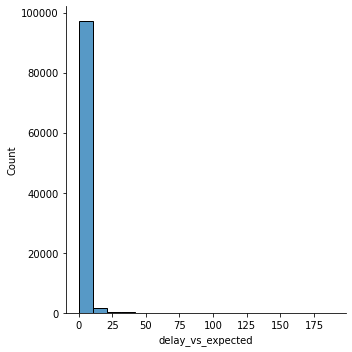

In [64]:
sns.displot(orders['delay_vs_expected'])

In [65]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

/Users/selmalopez/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/selmalopez/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/selmalopez/code/selmalopez/data-challenges/04-Decision-Science/olist/order.py:36: SettingWithCopyWarning: 
A value is trying to be se

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,2 days 08:58:27,15 days 13:03:27,0 days,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,1 days 17:49:23,19 days 03:18:23,0 days,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,0 days 05:11:11,26 days 15:21:11,0 days,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,3 days 18:11:53,26 days 04:31:54,0 days,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,0 days 22:27:55,12 days 02:41:21,0 days,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,1 days 01:23:58,18 days 14:05:55,0 days,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,1 days 10:23:44,23 days 11:01:02,0 days,delivered
99438,83c1379a015df1e13d02aae0204711ab,1 days 06:05:43,30 days 09:13:17,0 days,delivered
99439,11c177c8e97725db2631073c19f07b62,3 days 18:06:36,37 days 02:31:33,0 days,delivered


### `get_review_score`
     Returns a DataFrame with:
        order_id, dim_is_five_star, dim_is_one_star, review_score

👉 Load the `reviews`

In [66]:
# YOUR CODE HERE
reviews = data["order_reviews"]
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


👉 Let's create two functions `dim_five_star` and `dim_one_star`  
    We will apply them  `element_wise` to the `review_score` column in the next cell below.

In [67]:
def dim_five_star(d):
    # $CHALLENGIFY_BEGIN
    if d == 5:
        return 1
    else:
        return 0
    # $CHALLENGIFY_END


def dim_one_star(d):
    # $CHALLENGIFY_BEGIN
    if d == 1:
        return 1
    else:
        return 0

👉 Use these functions to create two boolean features `dim_is_five_star` and `dim_is_one_star`

In [68]:
# YOUR CODE HERE

reviews["dim_is_five_star"] = reviews["review_score"].map(dim_five_star) 
reviews["dim_is_one_star"] = reviews["review_score"].map(dim_one_star) 
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


Once again, 

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🙏 Now, test it by running the following cell 👇 

In [69]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### Check your code

In [70]:
from nbresult import ChallengeResult

result = ChallengeResult('reviews',
    dim_five_star=dim_five_star(5),
    dim_not_five_star=dim_five_star(3),
    dim_one_star=dim_one_star(1),
    dim_not_one_star=dim_one_star(2)
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/04-Decision-Science/02-Statistical-Inference/01-Orders
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_reviews.py::TestReviews::test_dim_five_star PASSED            [ 25%]
tests/test_reviews.py::TestReviews::test_dim_not_five_star PASSED        [ 50%]
tests/test_reviews.py::TestReviews::test_dim_not_one_star PASSED         [ 75%]
tests/test_reviews.py::TestReviews::test_dim_one_star PASSED             [100%]

============================== 4 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/reviews.pickle

git commit -m 'Completed reviews step'

git push origin master


### `get_number_products`:
     Returns a DataFrame with:
        order_id, number_of_products (total number of products per order)

In [71]:
# YOUR CODE HERE
p_df = data["order_items"].copy()
p_df = p_df[["order_id","product_id"]]
p_df = p_df.groupby('order_id').count()
p_df = p_df.rename(columns={'product_id':'number_of_products'}).reset_index()
p_df

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


👉 Same routine: 
* check your dataframe, 
* commit your code to `olist/order.py`
* and check that it truly works.

In [33]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_products()

,number_of_products
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1
fffce4705a9662cd70adb13d4a31832d,1


### `get_number_sellers`:
     Returns a DataFrame with:
        order_id, number_of_sellers (total number of unique sellers per order)
        
<details>
    <summary>- <i>Hint</i> -</summary>

`pd.Series.nunique()`
</details>

## YOUR CODE HERE


In [35]:
sellers = \
    data['order_items']\
    .groupby('order_id')['seller_id'].nunique().reset_index()

sellers.columns = ['order_id', 'number_of_sellers']
sellers.sort_values('number_of_sellers')

,order_id,number_of_sellers
0,00010242fe8c5a6d1ba2dd792cb16214,1
65559,aaaf314a8cf0d0da71e52c6cd4184cbd,1
65558,aaaea350ff8a957595f3c631d6b63d1b,1
65557,aaae80f5b6239bd9e1b22e9aa542c3e8,1
65556,aaabf43feb9498d9de4588eb73231c25,1
...,...,...
11231,1d23106803c48c391366ff224513fb7f,4
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5


In [36]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_number_sellers()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,1,1,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,1,1,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,1,1,1,1


### `get_price_and_freight`
     Returns a DataFrame with:
        order_id, price, freight_value

<details>
    <summary>- <i>Hint -</i></summary>

`pd.Series.agg()` allows you to apply one transformation method per column of your groupby object
</details>

In [37]:
# YOUR CODE HERE
price_freight = \
    data['order_items']\
    .groupby('order_id',
             as_index=False).agg({'price': 'sum',
                                  'freight_value': 'sum'})
price_freight

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [38]:
# Check your new dataframe and commit your code to olist/order.py when it works. 
Order().get_price_and_freight()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


### `get_distance_seller_customer` 
**(OPTIONAL - Try  to code this function only after finishing today's challenges - Skip to next section)**

    Returns a Dataframe with:
        [order_id, distance_seller_customer] 
               (the distance in km between customer and seller)

💡Have a look at the `haversine_distance` formula we coded for you in the `olist.utils` module

In [39]:
# YOUR CODE HERE
sellers = data['sellers']
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


👀 Check your new dataframe and commit your code to olist/order.py when it works. 

In [40]:
# YOUR CODE HERE
customers = data['customers']
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [73]:
data

,order_id,price_x,freight_value_x,order_item_id,number_of_products,number_of_sellers,shipping_limit_date,price_y,freight_value_y,number_of_products,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,wait_time,expected_wait_time,delay_vs_expected,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,1,1,1,1,1,1,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,6 days 09:35:14,15 days 15:00:58,0 days,delivered
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1,1,1,1,1,1,1,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,8 days 03:41:54,18 days 13:06:54,0 days,delivered
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1,1,1,1,1,1,1,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1 days 22:03:17,21 days 09:26:29,0 days,delivered
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1,1,1,1,1,1,1,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,2 days 03:27:25,11 days 13:59:25,0 days,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1,1,1,1,1,1,1,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,11 days 19:48:18,40 days 10:02:09,0 days,delivered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,1,1,1,1,1,1,1,9185f849f32d82e216a4e025e0c50f5c,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,1 days 22:11:54,24 days 10:02:54,0 days,delivered
96357,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,1,1,1,1,1,1,1,be803f6a93d64719fd685c1cc610918a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,2 days 21:38:14,17 days 13:33:14,0 days,delivered
96358,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,1,1,1,1,1,1,1,dbdd81cd59a1a9f94a10a990b4d48dce,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,2 days 22:05:18,17 days 06:52:04,0 days,delivered
96359,fffe18544ffabc95dfada21779c9644f,55.99,8.72,1,1,1,1,1,1,1,fba117c9ac40d41ca7be54741f471303,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,0 days 19:59:54,10 days 00:57:01,0 days,delivered


# Test your newly coded module

❓ Time to code `get_training_data` making use of your previous coded methods.

In [74]:
from olist.order import Order
from nbresult import ChallengeResult
data = Order().get_training_data()
result = ChallengeResult('training',
    shape=data.shape,
    columns=sorted(list(data.columns))
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/04-Decision-Science/02-Statistical-Inference/01-Orders
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_training.py::TestTraining::test_training_data_columns PASSED  [ 50%]
tests/test_training.py::TestTraining::test_training_data_shape PASSED    [100%]

============================== 2 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/training.pickle

git commit -m 'Completed training step'

git push origin master


🏁 Congratulations! 

⌛️ Commit and push your notebook before starting the next challenge.